In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [40]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This dataset contains Historical information about adjusted closing prices of wight different stocks from National Stock Exchange of India. \\
Following stocks are taken into consideration - \\

*   Reliance
*   Tata Consultancy Services
*   Bajaj Finance
*   Bharti Airtel
*   Tata Steel
*   HDFC
*   Cipla Pharmaceuticals
*   Havells




In [41]:
#trade = df
#df.drop(['RELIANCE','TCS','BAJAJ'],axis=1,inplace=True)

In [42]:
path = '/content/gdrive/MyDrive/STOCKS.csv'
df=pd.read_csv(path)

In [43]:
df.head()

,Date,RELIANCE,TCS,BAJAJ,BHARTIARTL,TATASTEEL,HDFC,CIPLA,HAVELLS
0,01-01-2020,1485.053467,2112.477783,4214.786133,451.678009,445.952454,1273.090088,474.667114,641.202820
1,02-01-2020,1510.335571,2102.780273,4229.478516,453.571259,462.255585,1281.204956,472.273315,646.089600
2,03-01-2020,1512.155518,2144.686768,4177.084473,453.471588,461.159180,1262.934082,468.732544,652.062317
3,06-01-2020,1477.085083,2144.492188,3981.102051,448.041077,451.196167,1235.602295,465.540802,638.882874
4,07-01-2020,1499.809570,2149.754639,3992.009277,443.507385,453.913361,1255.167603,467.386017,632.219055


In [44]:
stck = pd.read_csv(path)
stck.drop('Date',axis=1,inplace=True)

In [45]:
df['Date']= pd.to_datetime(df['Date'])
df.set_index('Date',inplace = True)

Plotting the variation of Stock Prices vs Number of days since 01-01-2016

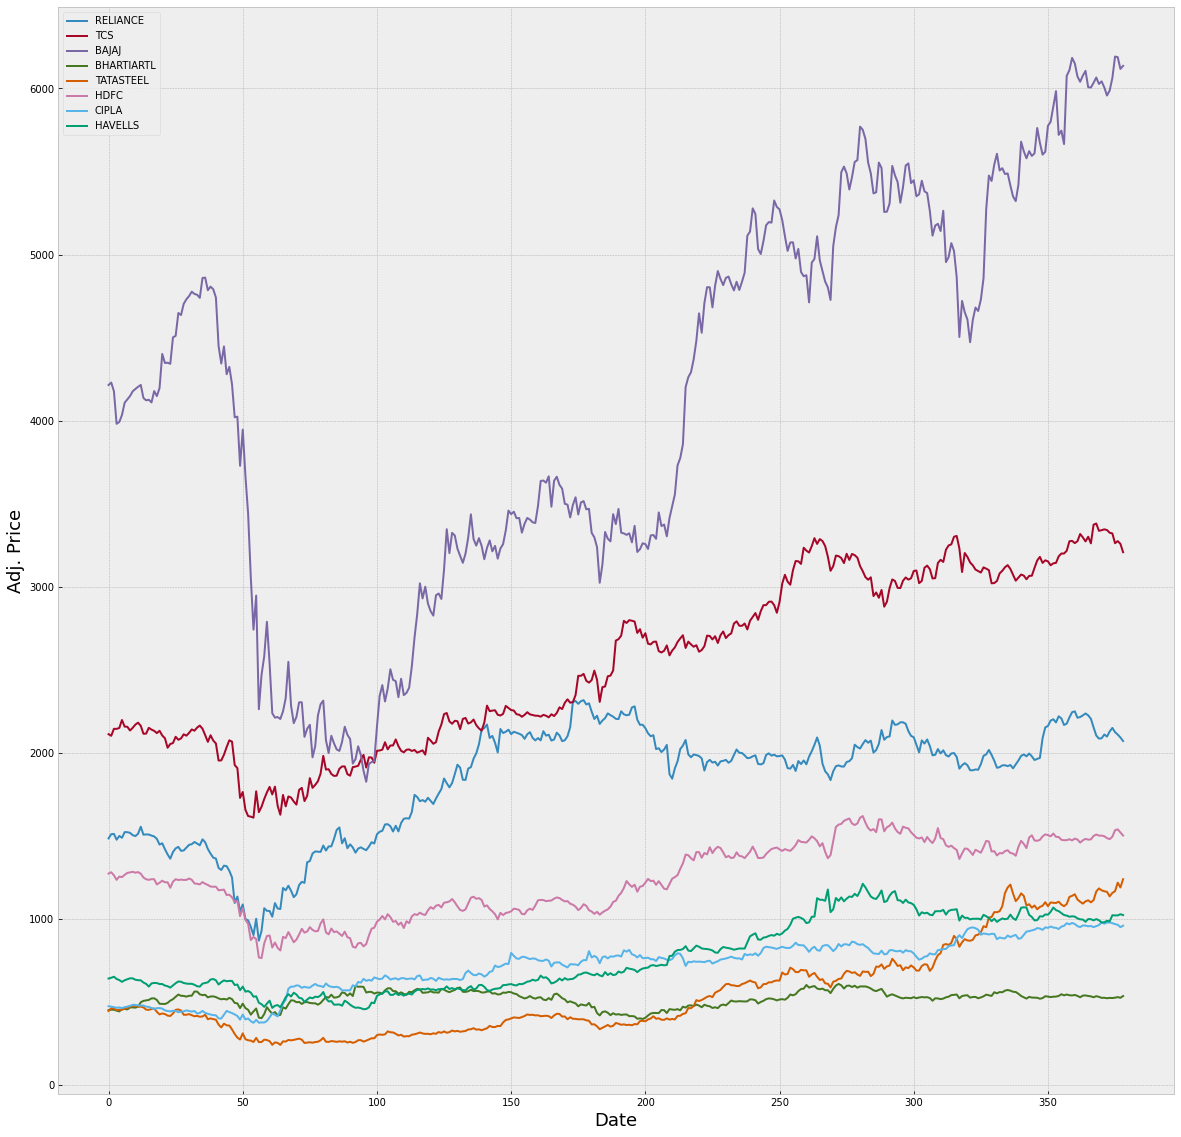

In [46]:

plt.figure(figsize=(20,20))
for c in stck.columns.values:
  plt.plot( stck[c],  label=c)

plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price',fontsize=18)
plt.legend(stck.columns.values, loc=2)
plt.show()

In [47]:
stocks =  [ "RELIANCE","TCS","BAJAJ","BHARTIARTL","TATASTEEL","HDFC","CIPLA","HAVELLS"]

Following formulae were applied in the next code cell 
<br><br>

>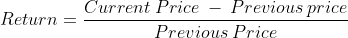





<br>

>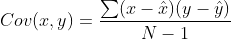

<br>
Resampling of data is important because we need to find annual return. Hence, taking the last of the values of yearly sampled data



In [48]:
returns = df.pct_change()
cov_matrix = returns.cov()
meanReturns = df.resample('Y').last().pct_change().mean()



> CodeCogsEqn (2).gif
<br>


> CodeCogsEqn (3).gif

>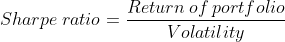




In [49]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights )
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(8)
        weights = weights/np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record
        

def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    optimised_weights = weights[max_sharpe_idx]
    return sdp,rp,optimised_weights,results
    

In [50]:
pip install PyPortfolioOpt

In [51]:
sdp,rp,optimised_weights,results = display_simulated_ef_with_random(meanReturns, cov_matrix, 10000, 0)

# Plot of efficient Frontier

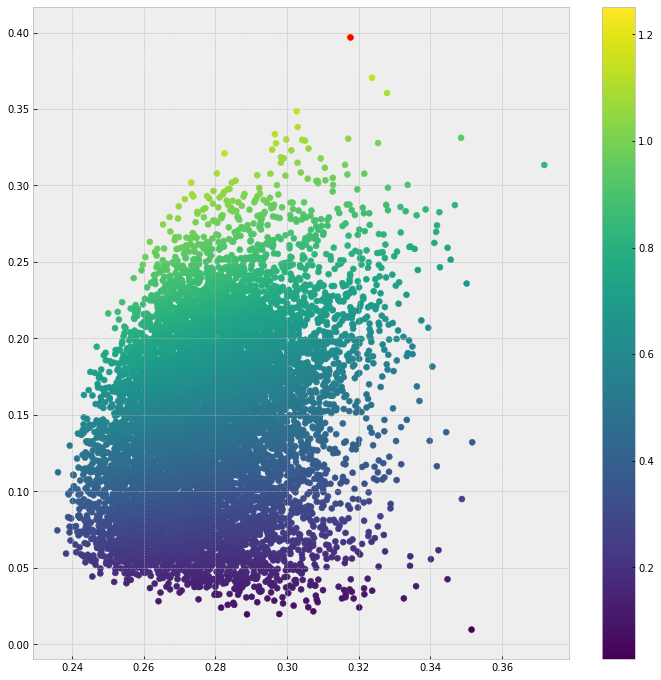

In [52]:
plt.figure(figsize=(12,12))
plt.scatter(results[0],results[1],c = results[2])
plt.colorbar()
plt.scatter(sdp,rp,c='red')
plt.show()

Using PyPortfolioOpt library to determine an investment portfolio for INR 10000 from above used assets

In [53]:
wtLST = optimised_weights.tolist()
wht = dict(zip(stocks,wtLST))
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = wht
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.lp_portfolio()
ALLOC = pd.Series(allocation,index=stocks)
print(ALLOC)
print("Funds remaining: Rs. {:.2f}".format(leftover))

RELIANCE      NaN
TCS           NaN
BAJAJ         NaN
BHARTIARTL    NaN
TATASTEEL     4.0
HDFC          2.0
CIPLA         2.0
HAVELLS       NaN
dtype: float64
Funds remaining: Rs. 119.00
